In [10]:
import warnings
warnings.filterwarnings('ignore')
import re

data manipulation


In [11]:
import pandas as pd
from pandarallel import pandarallel
import numpy as np
from datetime import datetime
import calendar

data visualization

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


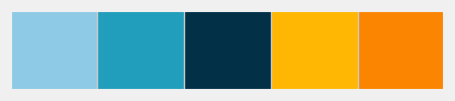

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud,  ImageColorGenerator
# file, serialization and deserialization
import os
import missingno as mso
# NLP
# NLP preprocessing
from bs4 import BeautifulSoup
pandarallel.initialize(progress_bar=True)
import string
string.punctuation
import nltk
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from yellowbrick.text import FreqDistVisualizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import set_config
# LR
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
# encoder
from sklearn.feature_extraction.text import CountVectorizer
# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")




In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-reviews/amazon_reviews.csv
/kaggle/input/amazon-product-reviews/Reviews.csv


In [16]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')

In [18]:
subset_df = df.iloc[10000:20000]

In [19]:
subset_df.to_csv('subset.csv', index=False)

create date column


In [50]:
df['date'] = pd.to_datetime(df['Time'],unit='s')
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year

Basic Analysis

In [20]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Columns datatype: 
 Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


Text(0.5, 1.0, 'Data Types')

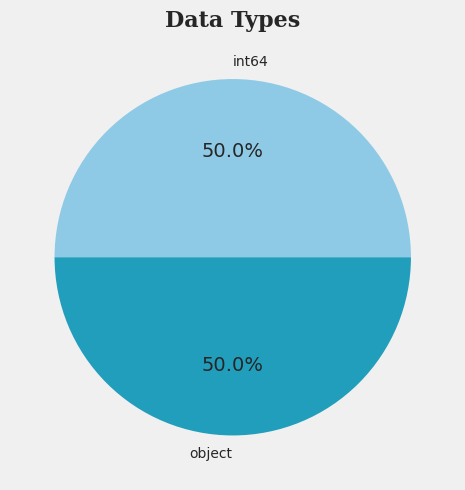

In [21]:
# print columns datatype
print(f'Columns datatype: \n {df.dtypes}')
# sns pie plot dttypes
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
# y label \
plt.ylabel('')
# set title with custom font
plt.title('Data Types', fontsize=16, fontweight='bold', fontdict={
    'fontsize': 18, 'fontfamily': 'serif', 'fontweight': 'bold'})

In [22]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Analyzing text statistics
This Step include:

Word frequency analysis,
Sentence length analysis,
Average word length analysis
First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length.

Number of characters present in each Text (Review)
Here I range the number of characters by 500 chars and so on.

In [23]:
text_len = df['Text'].groupby(pd.cut(df['Text'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()
text_len.head()

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443


In [24]:
text_len_50 = text_len[text_len['Text'] > 50]
text_len_50

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443
5,"(2500, 3000]",1556
6,"(3000, 3500]",960
7,"(3500, 4000]",346
8,"(4000, 4500]",260
9,"(4500, 5000]",310


<AxesSubplot:xlabel='Range', ylabel='Text'>

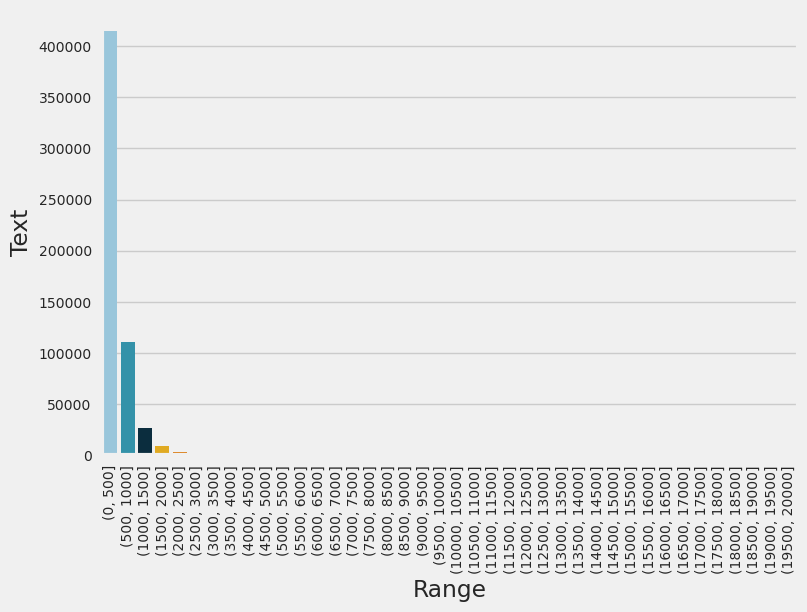

In [25]:
g = sns.barplot( x=text_len_50['Range'][0:10],y=text_len_50['Text'][0:10],palette=palette)
# g.set_xticks(range(11))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

<AxesSubplot:xlabel='Text', ylabel='Count'>

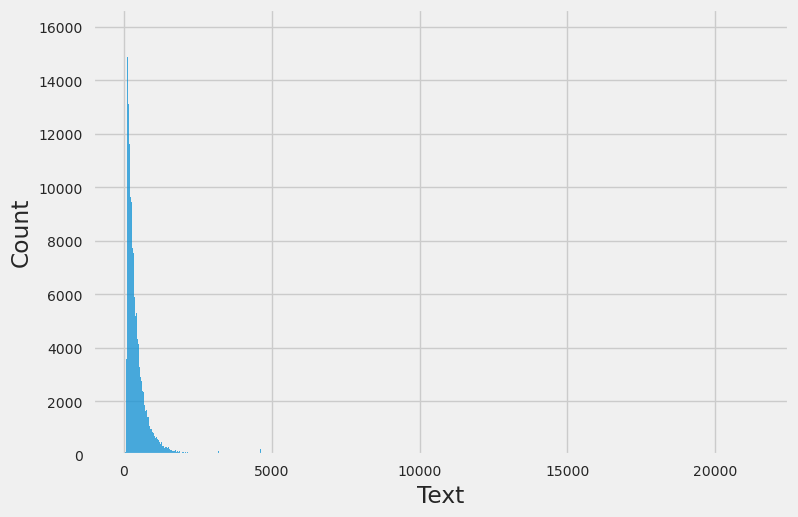

In [26]:
sns.histplot(data=df, x=df['Text'].str.len(),palette=palette)

<AxesSubplot:>

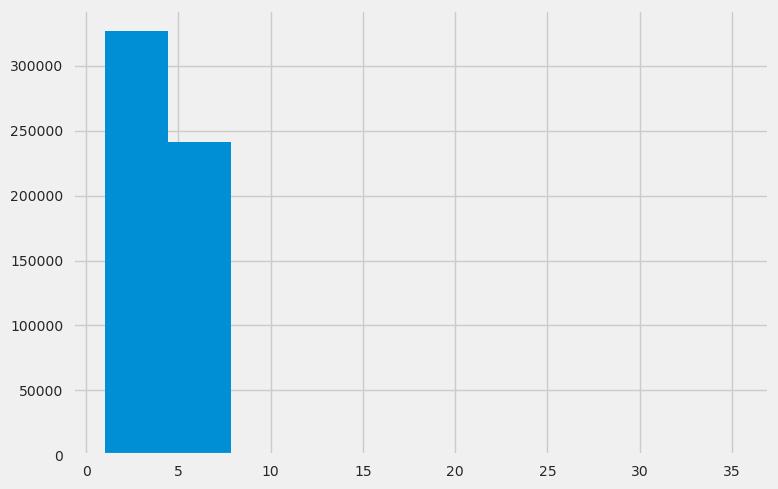

In [27]:
df['Text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Number of characters present in each Summary

<AxesSubplot:xlabel='Summary', ylabel='Count'>

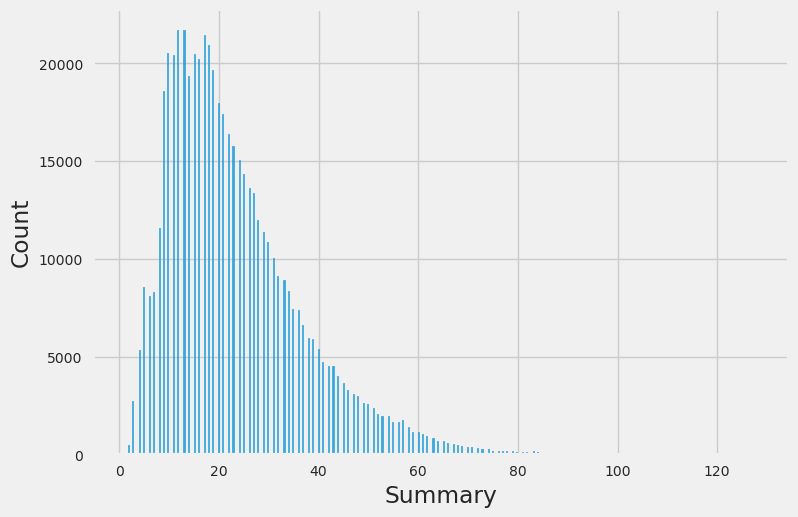

In [28]:
sns.histplot(data=df, x=df['Summary'].str.len(),palette=palette)

Analyzing Numrical statistics¶

Bar Chart Plot for Distribution of Rating

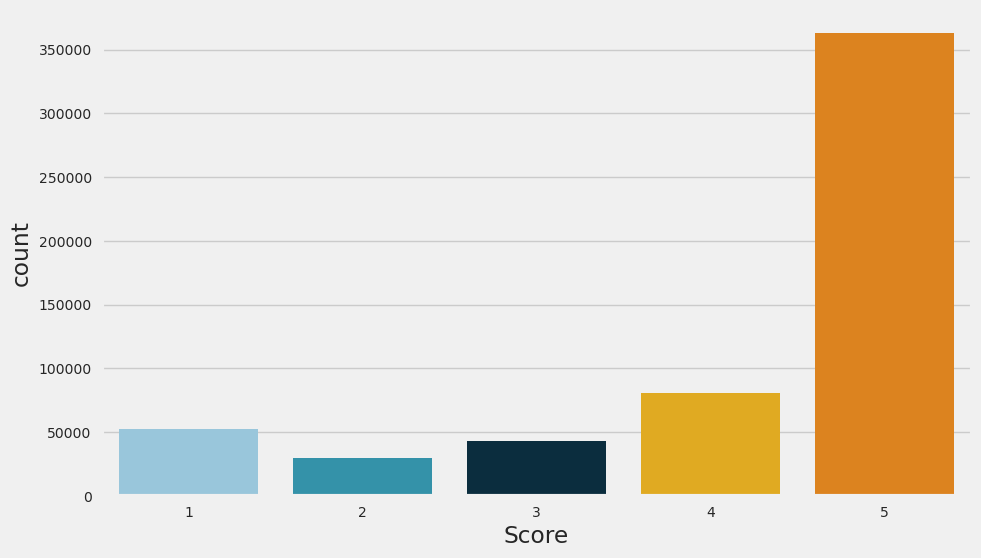

In [29]:
plt.figure(figsize=(10, 6))
g = sns.countplot(
    data=df, 
    x="Score",
    palette=palette,
)

Sentiment distribuation depand on Score values

In [36]:
df['Sentiment_Score'] = df['Score'].apply(lambda x: 1 if x >=3 else 0)

<AxesSubplot:xlabel='Sentiment_Score', ylabel='count'>

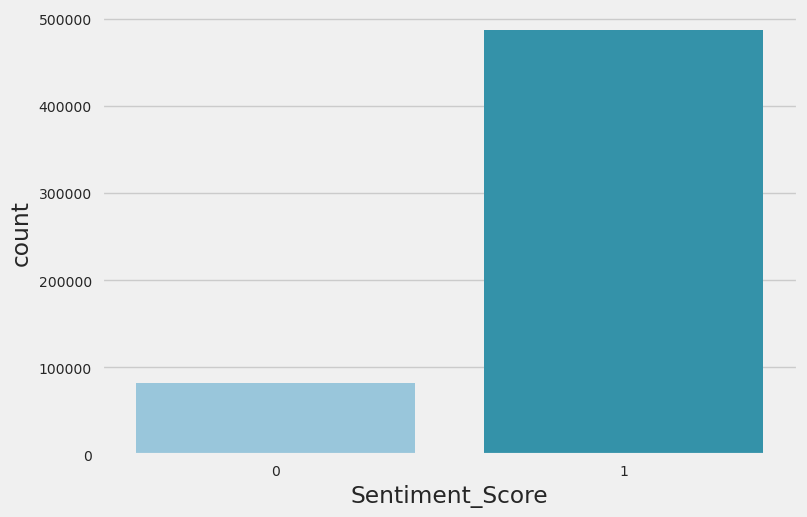

In [37]:
sns.countplot(data=df,x='Sentiment_Score', palette=palette)

Missing and Duplicate Values¶

Missing Values

<AxesSubplot:>

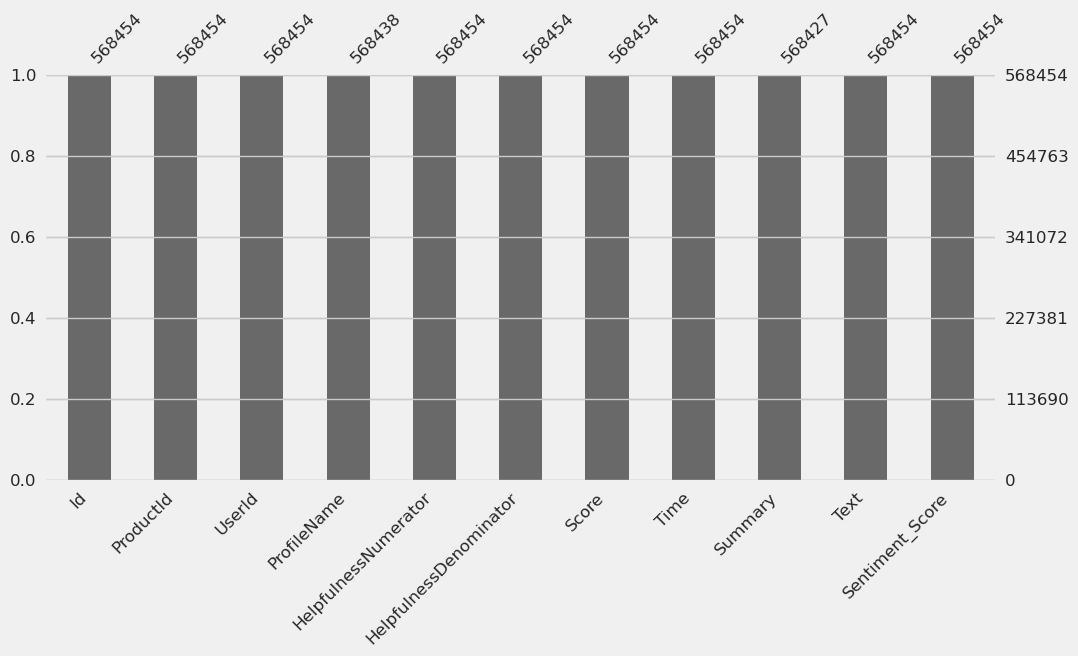

In [38]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12)

There are missing values in several columns, but if there are not many, I drop null values.

In [39]:
df.dropna(inplace=True)

duplicate values 

In [40]:
df.duplicated().sum()

0

Clean The Data

-Punctuation Removal
-Lowering the text
-Tokenization
-Stop word removal
-Stemming
-Lemmatization

In [41]:
df['Full_Text'] = df['Summary'] + ' ' + df['Text']

clean HTML

In [42]:
def clean_html(html):
    
    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

df['Full_Text_HTML'] = df['Full_Text'].parallel_apply(lambda x: clean_html(x))

panctuation removal


In [43]:
def remove_punctuation(text):
    punctuation ="".join([i for i in text if i not in string.punctuation])
    return punctuation
#storing the puntuation free text
df['clean_review']= df['Full_Text_HTML'].parallel_apply(lambda x:remove_punctuation(x))

lowering the text

In [44]:
df['lower_review'] = df['clean_review'].parallel_apply(lambda x: x.lower())

stop word removal

In [45]:
def remove_stopwords(text):
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']
    text_filtered = [word for word in text if not word in useless_words]
    final_string = ' '.join(text_filtered)
    return final_string
df['no_stopwords']= df['lower_review'].parallel_apply(lambda x:remove_stopwords(x))

Tokenization

In [46]:
df['review_tokenied']= df['no_stopwords'].parallel_apply(lambda x: nltk.word_tokenize(x))

Stemming

In [47]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    final_string = ' '.join(stem_text)
    return final_string
porter_stemmer = PorterStemmer()
df['review_stemmed']= df['review_tokenied'].parallel_apply(lambda x: stemming(x))

word cloud

<Figure size 1500x800 with 0 Axes>

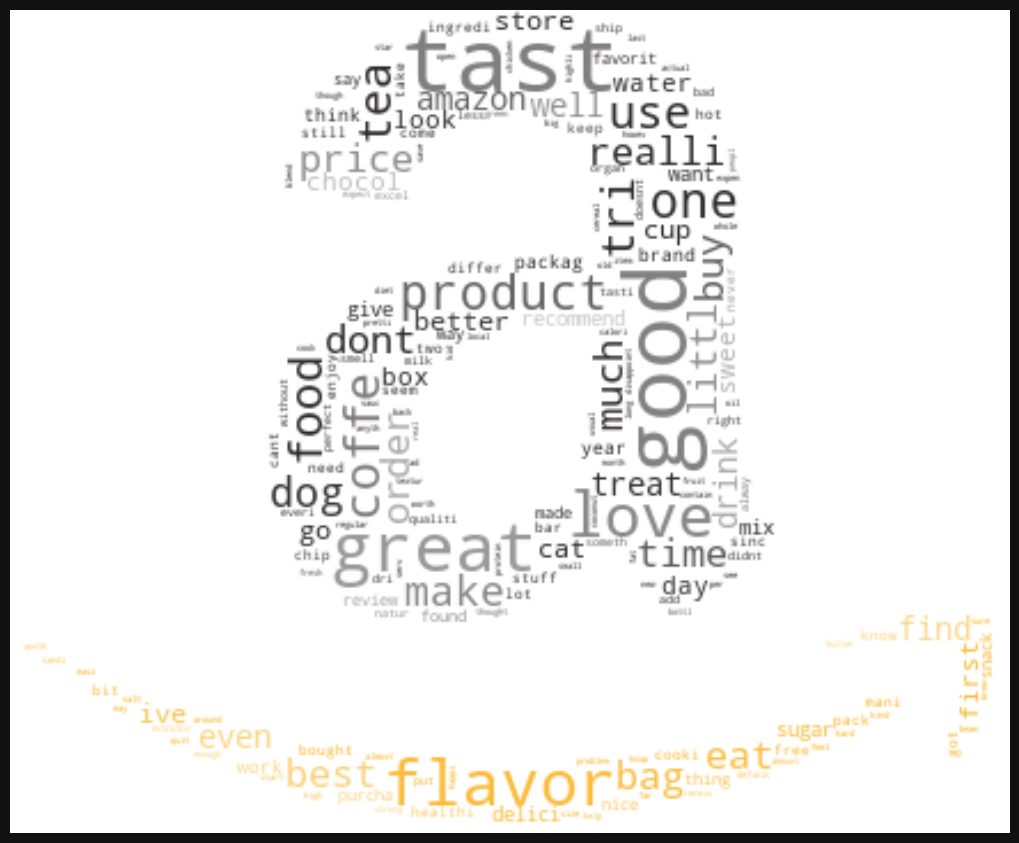

In [48]:
from PIL import Image
import requests

txt = ' '.join(''.join(rev) for rev in df.review_stemmed)
plt.figure(figsize=(15,8))
amazon_mask = np.array(Image.open(requests.get('https://pngimg.com/uploads/amazon/amazon_PNG4.png', stream=True).raw))
amazon_mask

wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=amazon_mask).generate(txt)
image_colors = ImageColorGenerator(amazon_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.show()

Textblob

In [49]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review_stemmed'].parallel_apply(lambda x : polarity(x))

In [50]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity']= df['polarity_score'].parallel_apply(lambda x: sentiment(x))

**Machine learning**
split data into train and test set

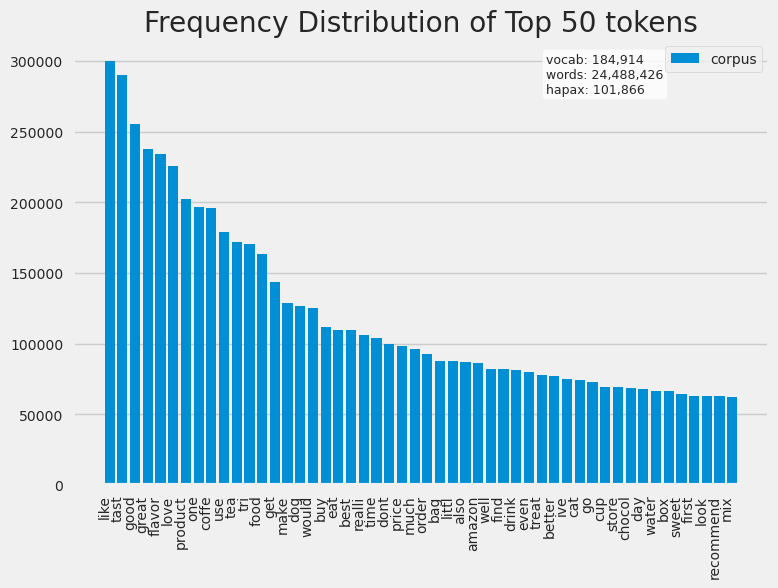

In [51]:
def word_distribution(text):
    vectorizer = CountVectorizer()
    docs = vectorizer.fit_transform(text)
    features = vectorizer.get_feature_names()
    # Freq Dist Visualizer
    visualizer = FreqDistVisualizer(features=features, orient='v')
    visualizer.fit(docs)
    visualizer.show()

word_distribution(df['review_stemmed'])

In [52]:
X = df['review_stemmed'].values
y = df['Sentiment_Score'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

pipeline

In [53]:
pipe = Pipeline(
    [
        ('vec', CountVectorizer(stop_words= "english")),
        ('tfidf', TfidfTransformer()),
        ('classifier', LogisticRegression()),
    ]
)

In [54]:
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('vec', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

fit pipeline

In [55]:
fit = pipe.fit(X_train,y_train)

predict

In [56]:
y_pred = pipe.predict(X_test)

Accuracy test and train

In [57]:
print('Training accuracy:', fit.score(X_train,y_train))
print('Test accuracy:', fit.score(X_test,y_test))

Training accuracy: 0.9366280501750497
Test accuracy: 0.9294793416781753


confusion matrix

<AxesSubplot:>

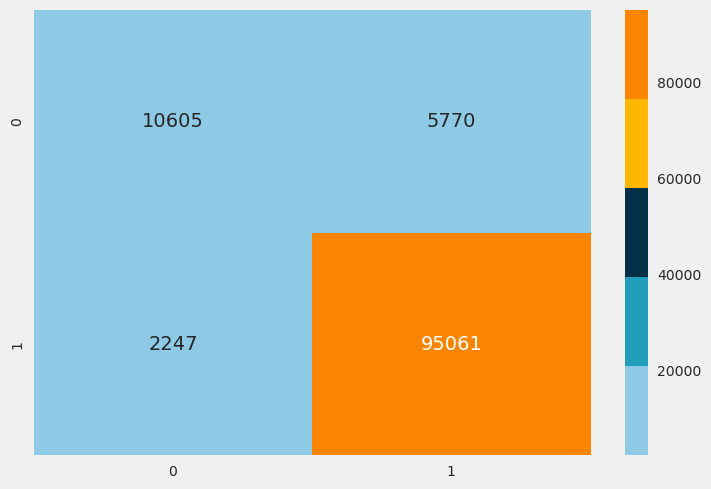

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap=colors)